In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [2]:
datos =pd.read_csv("Datos_limpio.csv")
datos.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,False,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,False,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,True,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,False,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,True,31.773932


¿Existe una vecindad en la que el nivel de estrés haga que la posibilidad de lesionarse se disparé?

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Height_cm                   800 non-null    int64  
 2   Weight_kg                   800 non-null    int64  
 3   Position                    800 non-null    object 
 4   Training_Hours_Per_Week     800 non-null    float64
 5   Matches_Played_Past_Season  800 non-null    int64  
 6   Previous_Injury_Count       800 non-null    int64  
 7   Knee_Strength_Score         800 non-null    float64
 8   Hamstring_Flexibility       800 non-null    float64
 9   Reaction_Time_ms            800 non-null    float64
 10  Balance_Test_Score          800 non-null    float64
 11  Sprint_Speed_10m_s          800 non-null    float64
 12  Agility_Score               800 non-null    float64
 13  Sleep_Hours_Per_Night       800 non

In [5]:
X = datos["Stress_Level_Score"]
y = datos["Injury_Next_Season"]

In [6]:
X_train, X_test ,y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(640,)

In [8]:
X_test.shape

(160,)

In [9]:
y_test.shape

(160,)

In [10]:
y_train.shape

(640,)

In [11]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((640, 1), (160, 1), (640, 1), (160, 1))

In [12]:
modelos ={"Linear Regresion": LinearRegression(),
          "KNN":KNeighborsClassifier(), 
          "Random Forest": RandomForestClassifier(),
          "Tree" :DecisionTreeClassifier(), 
          "REGRESION LOGISTICA":LogisticRegression()   
         
         }

for nombre, modelo  in modelos.items(): 
    pipeline_=make_pipeline(StandardScaler(), modelo)
    pipeline_.fit(X_train, y_train)
    print(f"{nombre}---->SCORE TRAIN  {modelo.score(X_train, y_train)}")
    print(f"{nombre}---->SCORE TEST  {modelo.score(X_test, y_test)}")

Linear Regresion---->SCORE TRAIN  -818.9188648894306
Linear Regresion---->SCORE TEST  -847.9444839521047
KNN---->SCORE TRAIN  0.5
KNN---->SCORE TEST  0.5


C:\Users\semab\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\semab\anaconda3\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest---->SCORE TRAIN  0.5
Random Forest---->SCORE TEST  0.5
Tree---->SCORE TRAIN  0.5
Tree---->SCORE TEST  0.5
REGRESION LOGISTICA---->SCORE TRAIN  0.5
REGRESION LOGISTICA---->SCORE TEST  0.5


C:\Users\semab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: xlabel='Stress_Level_Score', ylabel='Injury_Next_Season'>

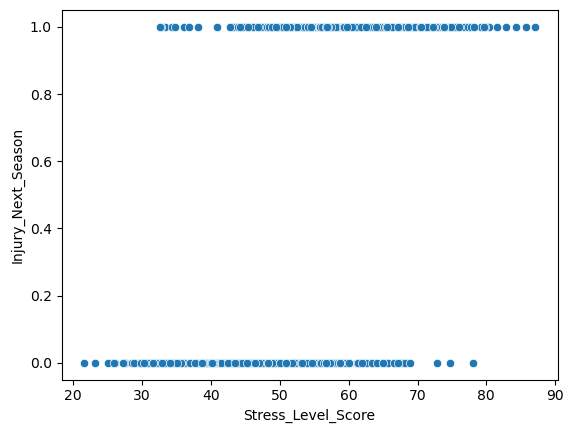

In [13]:
sns.scatterplot(x=X, y=y)

In [14]:
forest = RandomForestClassifier() 
pipeline_tree = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline_tree.fit(X_train, y_train)

C:\Users\semab\anaconda3\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,steps,"[('standardscaler', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [15]:
pipeline_tree.score(X_train, y_train)

1.0

In [16]:
prediccion = pipeline_tree.predict(X_test)
prediccion

array([ True,  True,  True,  True,  True, False,  True, False, False,
        True, False, False, False, False,  True, False,  True, False,
        True,  True,  True,  True, False,  True, False,  True, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False,  True, False, False,  True,  True,  True, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True,

In [17]:
pipeline_tree.score(X_test, y_test)

0.69375

In [18]:
pipeline_tree.predict_proba(X_test)###probabilidades de que cada variable en X_test correpsonda a False o True (en ese orden)

array([[0.26, 0.74],
       [0.  , 1.  ],
       [0.35, 0.65],
       [0.36, 0.64],
       [0.01, 0.99],
       [0.97, 0.03],
       [0.02, 0.98],
       [0.76, 0.24],
       [0.69, 0.31],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.91, 0.09],
       [0.99, 0.01],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.93, 0.07],
       [0.  , 1.  ],
       [0.56, 0.44],
       [0.26, 0.74],
       [0.35, 0.65],
       [0.28, 0.72],
       [0.  , 1.  ],
       [0.52, 0.48],
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.65, 0.35],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.34, 0.66],
       [0.  , 1.  ],
       [0.65, 0.35],
       [0.96, 0.04],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.69, 0.31],
       [1.  , 0.  ],
       [0.57, 0.43],
       [0.  , 1.  ],
       [0.24, 0.76],
       [0.39, 0.61],
       [0.32, 0.68],
       [0.6 , 0.4 ],
       [0.  , 1.  ],
       [0.73, 0.27],
       [0.72, 0.28],
       [0.  , 1.  ],
       [1.  ,

In [19]:
cv = cross_val_score(pipeline_tree, np.array(X).reshape(-1,1), np.array(y).reshape(-1,1), cv = 10)
cv

C:\Users\semab\anaconda3\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\semab\anaconda3\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\semab\anaconda3\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\semab\anaconda3\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

array([0.6375, 0.6125, 0.725 , 0.5875, 0.725 , 0.575 , 0.725 , 0.575 ,
       0.7625, 0.65  ])

In [20]:
print(f"El promdio que obtiene nuestro modelo es de {np.mean(cv)}")

El promdio que obtiene nuestro modelo es de 0.6575


In [21]:
junto_categorias = pd.concat([X, y], axis=1)
junto_categorias

,Stress_Level_Score,Injury_Next_Season
0,46.616415,False
1,49.368037,False
2,43.132808,True
3,51.528529,False
4,52.379718,True
...,...,...
795,70.472112,True
796,67.209293,True
797,78.213353,True
798,50.906356,False


In [22]:
junto_categorias["Injury_Next_Season"].value_counts()

Injury_Next_Season
False    400
True     400
Name: count, dtype: int64

In [23]:
no_lesion=junto_categorias[junto_categorias["Injury_Next_Season"]==False].sort_values(by=["Stress_Level_Score"],ascending=False).reset_index(drop=True)
no_lesion

,Stress_Level_Score,Injury_Next_Season
0,77.993896,False
1,74.648955,False
2,72.819316,False
3,68.885299,False
4,68.390492,False
...,...,...
395,25.939039,False
396,25.783371,False
397,25.051871,False
398,23.122009,False


(0.0, 0.07)

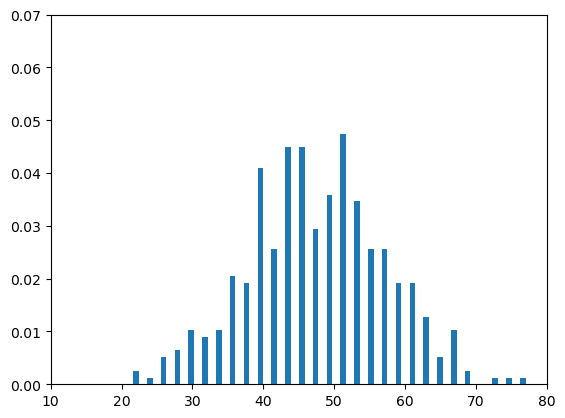

In [24]:
plt.hist(no_lesion, bins=40, density=True)
plt.xlim(10,80)
plt.ylim(0.0, 0.07)

In [25]:
lesion = junto_categorias[junto_categorias["Injury_Next_Season"]==True].sort_values(by=["Stress_Level_Score"],ascending=False).reset_index(drop=True)
lesion

,Stress_Level_Score,Injury_Next_Season
0,87.065007,True
1,85.702210,True
2,84.353308,True
3,82.816270,True
4,81.573838,True
...,...,...
395,34.702365,True
396,34.327127,True
397,33.381323,True
398,32.775044,True


(0.0, 0.07)

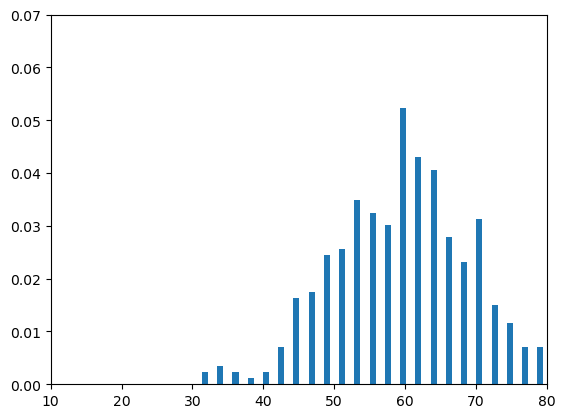

In [26]:
plt.hist(lesion, bins=40, density=True)
plt.xlim(10,80)
plt.ylim(0.0, 0.07)

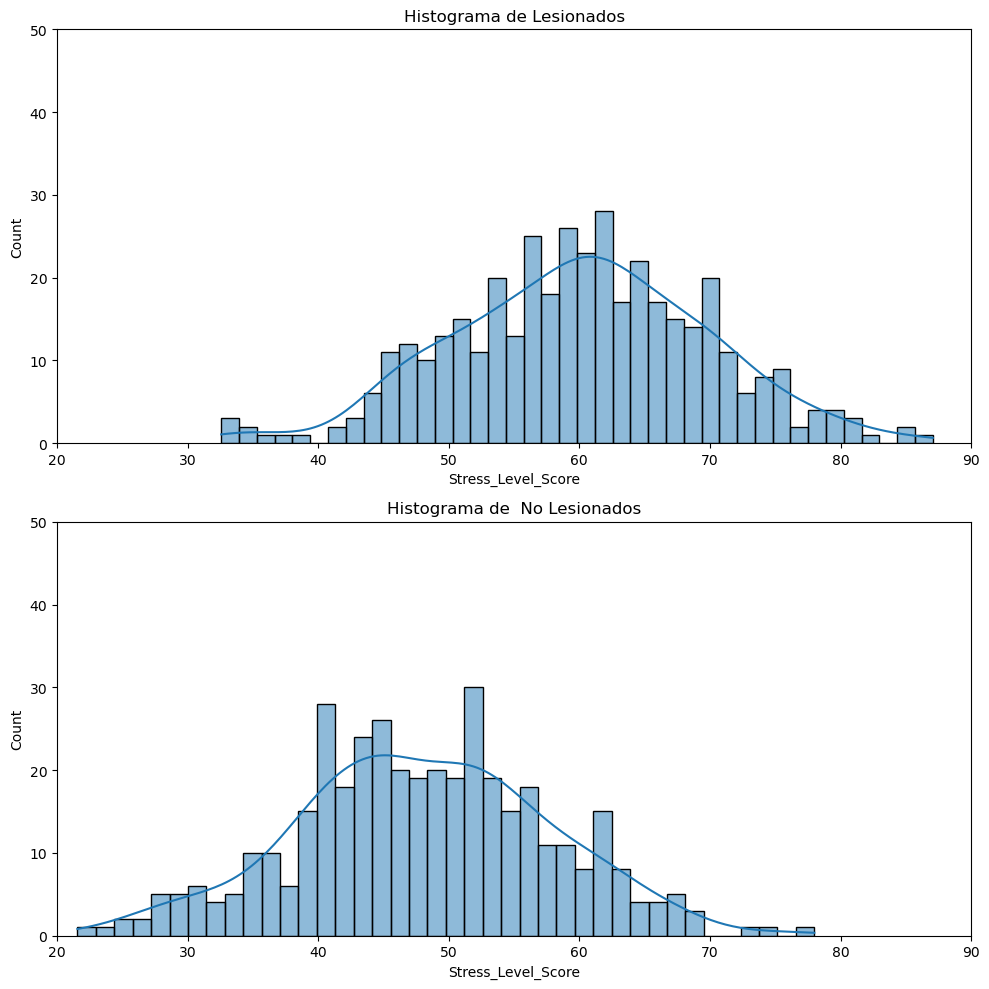

In [27]:
fig, ax =plt.subplots(2, 1, figsize =(10,10))
sns.histplot(x=lesion["Stress_Level_Score"], bins=40, kde=True, ax=ax[0])
ax[0].set_xlim(20, 90)
ax[0].set_ylim(0, 50)
ax[0].set_title("Histograma de Lesionados")

sns.histplot(x=no_lesion["Stress_Level_Score"], bins=40, kde=True, ax=ax[1])
ax[1].set_xlim(20, 90)
ax[1].set_ylim(0, 50)
ax[1].set_title("Histograma de  No Lesionados")
plt.tight_layout()
plt.show()

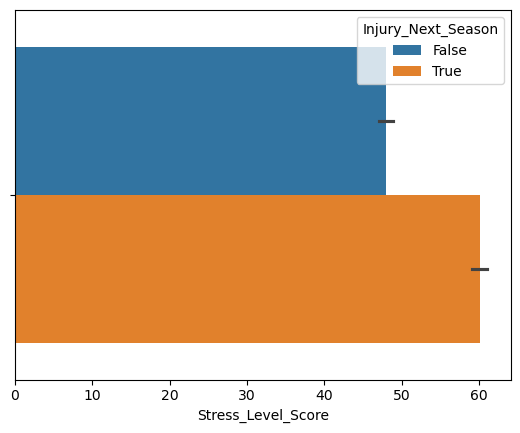

In [28]:
sns.barplot(data = junto_categorias,x= "Stress_Level_Score", hue="Injury_Next_Season")
plt.savefig("Grafico_barras_p3.png")


### Como notamos en promedio ,las personas que se lesionan su nivel de estress suele superar los 50 puntos

<Axes: xlabel='Stress_Level_Score'>

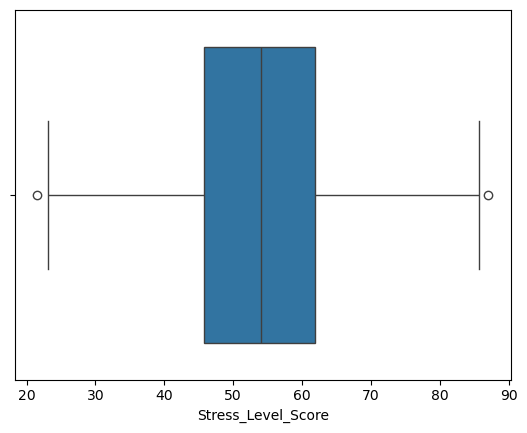

In [30]:
sns.boxplot(data = junto_categorias,x= "Stress_Level_Score" )